In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose,LeakyReLU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [2]:

#MNIST 데이터 읽고 신경망 입력 준비
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
y_train = y_train.astype('float32')/255.
#x_train = np.reshape(x_train, (len(x_train),28,28,1))
#x_test = np.reshape(x_test, (len(x_test),28,28,1))


x_train = np.reshape(x_train, (len(x_train),784))
x_test = np.reshape(x_test, (len(x_test),784))




In [3]:
##########################################
### 완성본
#오토인코더의 인코더 부분 설계
zdim = 3 #잠복 공간의 차원

encoder_input = Input(shape=(784))
x= Dense(128,activation='relu')(encoder_input)
x= Dense(64,activation='relu')(x)
x= Dense(12,activation='relu')(x)
encoder_output= Dense(zdim)(x)
model_encoder = Model(encoder_input, encoder_output)
model_encoder.summary()


#오토인코더의 디코더 부분 설계
decoder_input = Input(shape=(zdim,))
x=Dense(12)(decoder_input)
x=Dense(64, activation='relu')(x)
x=Dense(128, activation='relu')(x)
x=Dense(784, activation='relu')(x)
#x=Dense(784)(x)

decoder_output=x
model_decoder = Model(decoder_input, decoder_output)
model_decoder.summary()

#인코더와 디코더를 결합하여 오토인코더 모델 구축
model_input = encoder_input
model_output = model_decoder(encoder_output)
model= Model(model_input, model_output)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 39        
Total params: 109,555
Trainable params: 109,555
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Sh

In [4]:
################################################333
#오토인코더의 인코더 부분 설계
zdim = 3 #잠복 공간의 차원
                            

encoder_input = Input(shape=(784))
x= Dense(128)(encoder_input)
x=LeakyReLU(0.2)(x)
x= Dense(64)(x)
x=LeakyReLU(0.2)(x)
x= Dense(12)(x)
x=LeakyReLU(0.2)(x)
encoder_output= Dense(zdim)(x)
model_encoder = Model(encoder_input, encoder_output)
model_encoder.summary()


#오토인코더의 디코더 부분 설계
#오토인코더의 디코더 부분 설계
decoder_input = Input(shape=(zdim,))
x=Dense(12)(decoder_input)
x=Dense(64, activation='relu')(x)
x=Dense(128, activation='relu')(x)
x=Dense(784)(x)
#x=Dense(784)(x)

          
decoder_output=x
model_decoder = Model(decoder_input, decoder_output)
model_decoder.summary()

#인코더와 디코더를 결합하여 오토인코더 모델 구축
model_input = encoder_input
model_output = model_decoder(encoder_output)
model= Model(model_input, model_output)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                780       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12)                0   

In [5]:
#오토인코더 학습
adam =Adam(lr=0.005, beta_1=0.09)

model.compile(optimizer=adam, loss ='mse')
model.fit(x_train, x_train, epochs=3, batch_size = 64, 
          shuffle=True, validation_data=(x_test, x_test))

#복원 실험 1: x_test를 복원하는 예측 실험
decoded_img = model.predict(x_test)

C:\Users\HP\miniconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/3
938/938 [==============================] - 3s 2ms/step - loss: 0.0419 - val_loss: 2512.7397
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 0.0294 - val_loss: 2346.0190
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.0271 - val_loss: 3424.5583


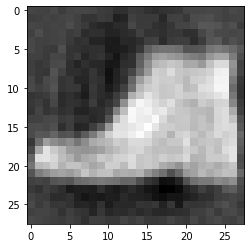

In [7]:
# 생성한 이미지임.
import matplotlib.pyplot as plt
plt.imshow(decoded_img[0].reshape(28,28),cmap='gray')

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


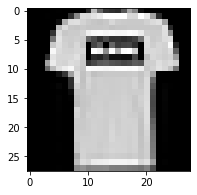

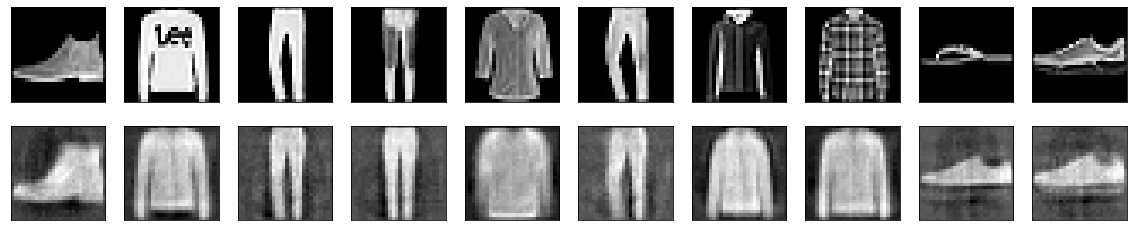

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]


##### 모델의 첫번째 레이어만 사용
plt.figure(figsize=(15,3))
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
visual_model.summary()      

xdata=np.reshape(x_train[1],(784))
test_img = np.expand_dims(xdata, axis = 0)
feature_maps = visual_model.predict(test_img)
plt.imshow(x_train[1].reshape(28,28),cmap='gray')


import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.xticks([]); plt.yticks([]);
    plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_img[i].reshape(28,28),cmap='gray')
    plt.xticks([]); plt.yticks([]); 
plt.show()